In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tqdm
import re
from sklearn import preprocessing

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, palette=palette)  # 解决Seaborn中文显示问题

In [83]:

def loadFileHelper():
    df = None

    def loadFile(frame: pd.DataFrame) -> pd.DataFrame:
        nonlocal df
        if df is None:
            df = frame.copy()
            return df
        df = pd.concat([df, frame], axis=1)
        return df

    def final() -> pd.DataFrame:
        return df

    return loadFile, final

In [92]:

attachList = []
for dirI in range(1, 9):
    for root, _, files in os.walk(f'../3rd天府杯A提/附件{dirI}'):
        sorted_files = sorted(files, key=lambda x: int(os.path.splitext(x)[0]))
        attachList += [f'{os.path.join(root, i)}' for i in sorted_files]

attachList

['../3rd天府杯A提/附件1\\1.txt',
 '../3rd天府杯A提/附件1\\2.txt',
 '../3rd天府杯A提/附件1\\3.txt',
 '../3rd天府杯A提/附件1\\4.txt',
 '../3rd天府杯A提/附件1\\5.txt',
 '../3rd天府杯A提/附件1\\6.txt',
 '../3rd天府杯A提/附件1\\7.txt',
 '../3rd天府杯A提/附件1\\8.txt',
 '../3rd天府杯A提/附件1\\9.txt',
 '../3rd天府杯A提/附件1\\10.txt',
 '../3rd天府杯A提/附件1\\11.txt',
 '../3rd天府杯A提/附件1\\12.txt',
 '../3rd天府杯A提/附件1\\13.txt',
 '../3rd天府杯A提/附件1\\14.txt',
 '../3rd天府杯A提/附件1\\15.txt',
 '../3rd天府杯A提/附件1\\16.txt',
 '../3rd天府杯A提/附件1\\17.txt',
 '../3rd天府杯A提/附件1\\18.txt',
 '../3rd天府杯A提/附件1\\19.txt',
 '../3rd天府杯A提/附件1\\20.txt',
 '../3rd天府杯A提/附件2\\1.txt',
 '../3rd天府杯A提/附件2\\2.txt',
 '../3rd天府杯A提/附件2\\3.txt',
 '../3rd天府杯A提/附件2\\4.txt',
 '../3rd天府杯A提/附件2\\5.txt',
 '../3rd天府杯A提/附件2\\6.txt',
 '../3rd天府杯A提/附件2\\7.txt',
 '../3rd天府杯A提/附件2\\8.txt',
 '../3rd天府杯A提/附件2\\9.txt',
 '../3rd天府杯A提/附件2\\10.txt',
 '../3rd天府杯A提/附件2\\11.txt',
 '../3rd天府杯A提/附件2\\12.txt',
 '../3rd天府杯A提/附件2\\13.txt',
 '../3rd天府杯A提/附件2\\14.txt',
 '../3rd天府杯A提/附件2\\15.txt',
 '../3rd天府杯A提/附件2\\16.txt',
 '../3rd天府

In [95]:
helper, getFinalDf = loadFileHelper()

tqdmList = tqdm.tqdm(attachList)
for i in tqdmList:
    res = re.search(r'附件(\d+)\\(\d+)', i)
    header = '-'.join(res.groups())
    tqdmList.set_description(i, header)
    df = pd.read_table(i, sep=r'\n', header=None, engine='python')
    df.columns = [header]
    helper(df)

df = getFinalDf()
df

../3rd天府杯A提/附件8\30.txt: 100%|██████████| 170/170 [00:03<00:00, 54.75it/s]


,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,...,8-21,8-22,8-23,8-24,8-25,8-26,8-27,8-28,8-29,8-30
0,0.031847,0.016663,0.020103,0.005837,-0.011276,-0.025771,0.021692,0.009281,0.010529,0.001247,...,-9.679108,-2.319808,-18.703373,6.533483,20.799034,-53.410206,9.416552,11.053165,-5.428255,-11.606074
1,-0.011189,-0.002048,0.006537,0.023145,0.012113,-0.017351,0.010933,-0.003817,0.004915,-0.007641,...,-9.327146,-5.516180,-24.892555,-0.396517,5.738626,-61.589596,8.462877,15.089084,-4.420704,-10.087299
2,-0.019609,-0.007661,-0.002818,0.003030,0.021468,-0.009866,0.007658,-0.004752,0.003980,-0.002028,...,-7.958519,-7.522062,-28.146841,-7.194655,-9.456475,-69.321838,7.138796,17.843573,-2.655398,-9.089544
3,0.019685,0.007308,-0.002351,-0.019423,0.004160,-0.003318,0.005787,-0.018318,-0.022216,-0.028223,...,-5.693323,-8.335984,-28.462965,-13.267302,-23.552597,-75.982040,5.501653,19.054186,-0.385398,-8.460361
4,-0.020076,0.001226,-0.020594,0.016596,0.013048,-0.015948,-0.000294,-0.023931,0.003045,-0.024481,...,-2.737343,-8.099121,-26.189087,-18.153183,-35.564842,-81.187347,3.600021,18.593573,2.107255,-7.919340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-2.936200,1.122488,1.303684,-0.291669,-0.145528,0.035976,0.138636,-0.077726,0.077889,-0.176508,...,14.900795,34.438034,-22.248474,2.227601,55.010464,-41.308983,-25.541817,-9.548468,36.734196,58.555965
7996,-3.392283,2.000974,0.883152,-0.199985,0.457904,0.205311,0.186349,-0.010833,0.116246,-0.133005,...,7.446579,38.533329,-21.719902,6.016424,54.616383,-17.208982,-33.014061,-8.434589,43.017868,52.443722
7997,-2.868840,1.194994,0.248846,0.020338,0.813415,0.481300,0.176526,-0.000075,0.141039,-0.115230,...,1.258834,42.375584,-20.843985,9.369366,52.959850,7.429181,-39.193447,-7.400916,48.391541,46.517189
7998,-2.935732,-0.888954,-0.528132,0.284164,0.943457,0.712382,0.149862,-0.014108,0.181735,-0.082953,...,-3.315088,45.779606,-19.569902,12.115640,49.998829,30.841425,-43.725285,-6.257651,52.505825,40.839844


In [99]:
天然地震df = df.iloc[:, :-30]
天然地震df

,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,...,7-11,7-12,7-13,7-14,7-15,7-16,7-17,7-18,7-19,7-20
0,0.031847,0.016663,0.020103,0.005837,-0.011276,-0.025771,0.021692,0.009281,0.010529,0.001247,...,-0.117107,-0.074528,0.624229,0.301207,0.474272,0.045762,-0.668258,1.265104,0.004534,-0.009769
1,-0.011189,-0.002048,0.006537,0.023145,0.012113,-0.017351,0.010933,-0.003817,0.004915,-0.007641,...,-0.113252,-0.086088,0.658908,0.339724,0.458840,-0.077554,-0.833916,1.110840,0.004534,0.005652
2,-0.019609,-0.007661,-0.002818,0.003030,0.021468,-0.009866,0.007658,-0.004752,0.003980,-0.002028,...,-0.113252,-0.105354,0.709001,0.378242,0.466556,-0.154626,-0.972605,0.891012,0.004534,-0.013624
3,0.019685,0.007308,-0.002351,-0.019423,0.004160,-0.003318,0.005787,-0.018318,-0.022216,-0.028223,...,-0.128671,-0.086088,0.766799,0.428314,0.466556,-0.177748,-1.061213,0.651903,0.000677,-0.009769
4,-0.020076,0.001226,-0.020594,0.016596,0.013048,-0.015948,-0.000294,-0.023931,0.003045,-0.024481,...,-0.093978,-0.093794,0.828451,0.470684,0.412548,-0.158480,-1.057360,0.432077,0.000677,0.001797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-2.936200,1.122488,1.303684,-0.291669,-0.145528,0.035976,0.138636,-0.077726,0.077889,-0.176508,...,-2.349002,2.210447,2.928470,1.283404,-2.303295,0.038054,-3.661649,-0.705624,-4.005563,-4.921185
7996,-3.392283,2.000974,0.883152,-0.199985,0.457904,0.205311,0.186349,-0.010833,0.116246,-0.133005,...,1.212779,2.722928,2.905350,1.321920,-2.172132,-0.112237,-3.442057,-0.451088,-3.415616,-4.261961
7997,-2.868840,1.194994,0.248846,0.020338,0.813415,0.481300,0.176526,-0.000075,0.141039,-0.115230,...,3.170988,4.869186,2.893791,1.352735,-2.071831,-0.339600,-3.095332,-0.196552,-2.848805,-3.248065
7998,-2.935732,-0.888954,-0.528132,0.284164,0.943457,0.712382,0.149862,-0.014108,0.181735,-0.082953,...,6.343440,6.714890,2.859112,1.383549,-2.006250,-0.624768,-2.713934,0.131260,-2.393813,-1.937326


In [100]:
人工爆破df = df.iloc[:, -30:]
人工爆破df

,8-1,8-2,8-3,8-4,8-5,8-6,8-7,8-8,8-9,8-10,...,8-21,8-22,8-23,8-24,8-25,8-26,8-27,8-28,8-29,8-30
0,-12.301487,-6.755664,-3.481101,14.613235,-56.581928,-19.432631,-33.967102,16.815691,23.275391,-52.974918,...,-9.679108,-2.319808,-18.703373,6.533483,20.799034,-53.410206,9.416552,11.053165,-5.428255,-11.606074
1,-20.110670,-6.186481,-0.793958,17.036705,-55.657642,-28.327196,-32.017540,10.192864,5.198435,-63.585136,...,-9.327146,-5.516180,-24.892555,-0.396517,5.738626,-61.589596,8.462877,15.089084,-4.420704,-10.087299
2,-26.796997,-5.458317,2.013185,19.010990,-53.212746,-35.569153,-27.452972,5.472429,-12.615696,-73.951225,...,-7.958519,-7.522062,-28.146841,-7.194655,-9.456475,-69.321838,7.138796,17.843573,-2.655398,-9.089544
3,-31.890671,-4.815664,4.666858,20.438337,-49.525192,-40.711327,-20.603409,2.710255,-28.700695,-83.117523,...,-5.693323,-8.335984,-28.462965,-13.267302,-23.552597,-75.982040,5.501653,19.054186,-0.385398,-8.460361
4,-35.068832,-4.464440,6.870124,21.253235,-44.935604,-43.475456,-12.023408,1.658299,-41.896564,-90.394264,...,-2.737343,-8.099121,-26.189087,-18.153183,-35.564842,-81.187347,3.600021,18.593573,2.107255,-7.919340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-57.212711,24.196377,-14.756203,14.489765,-25.795603,-49.127632,38.119202,4.280690,17.495827,12.369864,...,14.900795,34.438034,-22.248474,2.227601,55.010464,-41.308983,-25.541817,-9.548468,36.734196,58.555965
7996,-69.285774,31.671070,-9.988856,17.156092,-29.644175,-73.555237,32.112026,16.642647,9.981479,45.109211,...,7.446579,38.533329,-21.719902,6.016424,54.616383,-17.208982,-33.014061,-8.434589,43.017868,52.443722
7997,-79.474342,38.965969,-4.615999,19.705276,-31.971317,-95.766106,27.962679,27.897211,2.834087,77.298561,...,1.258834,42.375584,-20.843985,9.369366,52.959850,7.429181,-39.193447,-7.400916,48.391541,46.517189
7998,-86.434143,45.959846,1.435226,22.088541,-32.558460,-113.732630,25.867680,37.658298,-3.782435,106.945520,...,-3.315088,45.779606,-19.569902,12.115640,49.998829,30.841425,-43.725285,-6.257651,52.505825,40.839844


In [104]:
人工爆破df['8-1']

0      -12.301487
1      -20.110670
2      -26.796997
3      -31.890671
4      -35.068832
          ...    
7995   -57.212711
7996   -69.285774
7997   -79.474342
7998   -86.434143
7999   -89.259445
Name: 8-1, Length: 8000, dtype: float64

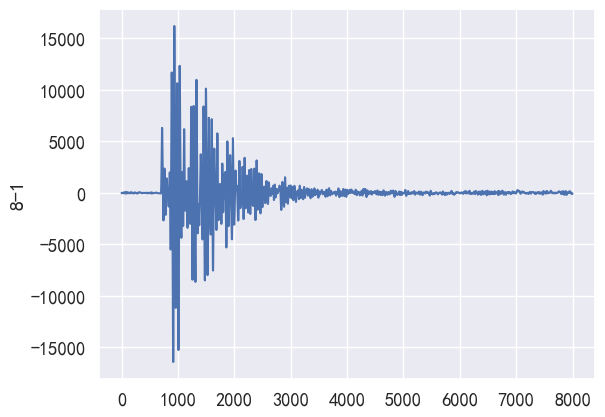

In [126]:
sns.lineplot(人工爆破df['8-1'])
plt.show()

In [161]:
scaler = preprocessing.StandardScaler()
scaleDf = pd.DataFrame(scaler.fit_transform(人工爆破df), columns=人工爆破df.columns)
scaleDf

,8-1,8-2,8-3,8-4,8-5,8-6,8-7,8-8,8-9,8-10,...,8-21,8-22,8-23,8-24,8-25,8-26,8-27,8-28,8-29,8-30
0,-0.005551,0.001202,0.000074,0.009478,-0.067317,-0.008951,-0.018505,0.008764,0.016276,-0.032783,...,-0.010916,-0.003982,-0.012256,0.009064,0.013410,-0.027382,0.004699,0.003356,0.000226,-0.006010
1,-0.009509,0.001335,0.000702,0.011004,-0.066072,-0.014454,-0.017302,0.004975,0.006080,-0.039216,...,-0.010668,-0.007356,-0.015211,0.001199,0.006357,-0.031241,0.004388,0.004541,0.000528,-0.005237
2,-0.012897,0.001506,0.001358,0.012247,-0.062780,-0.018934,-0.014487,0.002274,-0.003967,-0.045500,...,-0.009702,-0.009473,-0.016765,-0.006517,-0.000760,-0.034889,0.003956,0.005349,0.001057,-0.004730
3,-0.015479,0.001656,0.001979,0.013146,-0.057815,-0.022116,-0.010262,0.000694,-0.013040,-0.051058,...,-0.008104,-0.010333,-0.016916,-0.013409,-0.007361,-0.038032,0.003422,0.005704,0.001737,-0.004410
4,-0.017090,0.001738,0.002494,0.013659,-0.051635,-0.023826,-0.004969,0.000092,-0.020482,-0.055469,...,-0.006018,-0.010082,-0.015830,-0.018954,-0.012987,-0.040488,0.002802,0.005569,0.002484,-0.004134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.028312,0.008452,-0.002563,0.009401,-0.025864,-0.027323,0.025959,0.001592,0.013016,0.006834,...,0.006428,0.034819,-0.013948,0.004177,0.029433,-0.021672,-0.006706,-0.002688,0.012859,0.029693
7996,-0.034431,0.010203,-0.001448,0.011079,-0.031046,-0.042437,0.022254,0.008665,0.008778,0.026683,...,0.001168,0.039142,-0.013696,0.008477,0.029249,-0.010301,-0.009144,-0.002361,0.014742,0.026582
7997,-0.039594,0.011912,-0.000192,0.012684,-0.034179,-0.056179,0.019695,0.015104,0.004747,0.046199,...,-0.003198,0.043198,-0.013278,0.012282,0.028473,0.001323,-0.011160,-0.002058,0.016352,0.023567
7998,-0.043121,0.013551,0.001223,0.014185,-0.034970,-0.067295,0.018402,0.020689,0.001015,0.064173,...,-0.006425,0.046791,-0.012669,0.015399,0.027086,0.012370,-0.012638,-0.001722,0.017584,0.020678


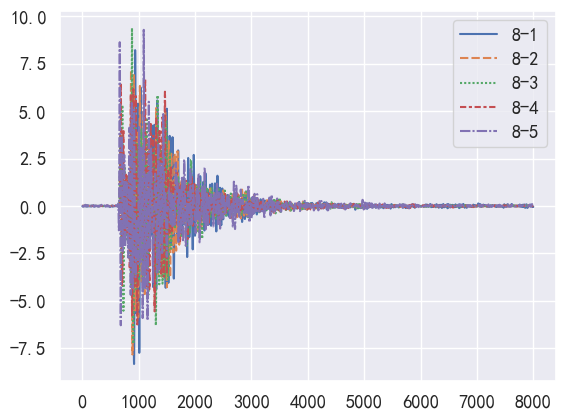

In [171]:
sns.lineplot(scaleDf[['8-1', '8-2', '8-3', '8-4', '8-5']])
plt.show()

MFCC shape: (20, 16)


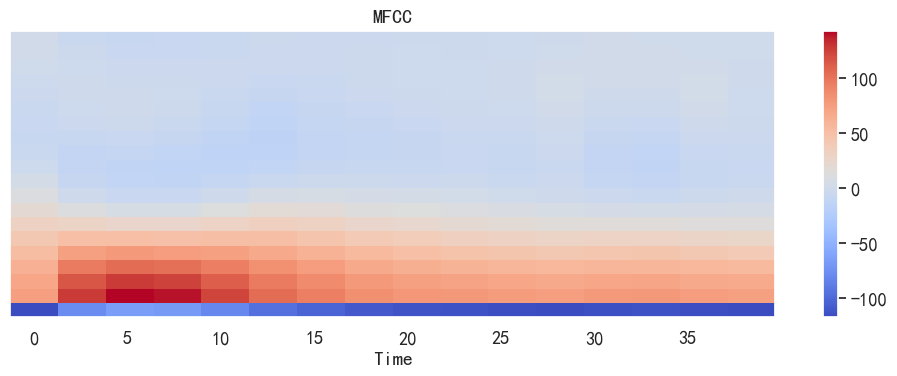

In [184]:
import librosa

mfccs = librosa.feature.mfcc(y=scaleDf['8-1'].values, sr=200, n_mfcc=12)

# 打印MFCC特征的形状
print("MFCC shape:", mfccs.shape)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=200, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


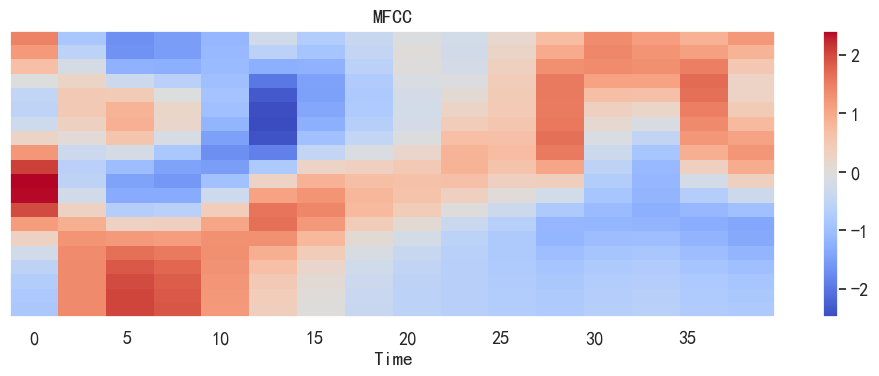

In [185]:
mfccsScale = preprocessing.scale(mfccs, axis=1)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccsScale, sr=200, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [186]:
mfccsScale

array([[-0.8276236 ,  1.36670515,  2.04826063,  1.87980366,  1.19007699,
         0.37971307, -0.00568827, -0.40775476, -0.58641251, -0.64882842,
        -0.73259119, -0.77162491, -0.6844844 , -0.64327901, -0.75479379,
        -0.80147864],
       [-0.80303525,  1.36954694,  2.03219569,  1.86749107,  1.20006382,
         0.40741382,  0.01545381, -0.39557733, -0.57870298, -0.65009645,
        -0.7371781 , -0.78643427, -0.69527512, -0.65313695, -0.76940852,
        -0.82332017],
       [-0.72182162,  1.37653608,  1.97807739,  1.82530748,  1.2295208 ,
         0.49526455,  0.08334408, -0.35600459, -0.55323949, -0.6529707 ,
        -0.75081121, -0.83225171, -0.72965962, -0.68519803, -0.81557252,
        -0.89052087],
       [-0.55760883,  1.3809154 ,  1.8639003 ,  1.73349545,  1.27494407,
         0.65833435,  0.21290197, -0.2784292 , -0.50154823, -0.65339002,
        -0.77212274, -0.91249506, -0.79389644, -0.74761331, -0.90018419,
        -1.00720353],
       [-0.25171978,  1.36094206,  1

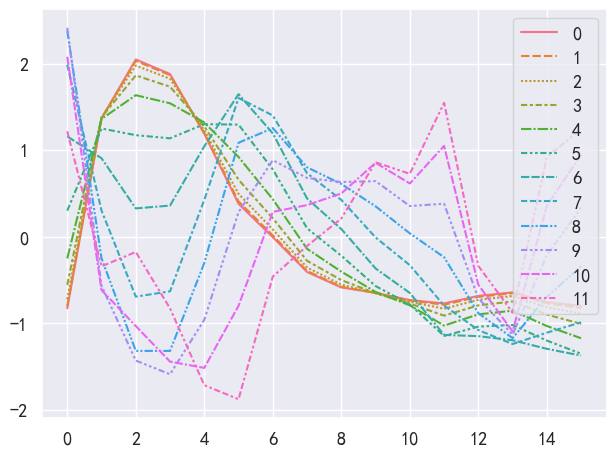

In [183]:
sns.lineplot(mfccsScale.T)
plt.tight_layout()
plt.show()